In [1]:
LEX_REPS = ["bert", "pos", "emb-pos"]

In [2]:
TRANSITION_SYSTEMS = ["inorder", "topdown"]

In [3]:
BEAM_SIZE=10

In [4]:
SEEDS = 3

In [5]:
import load_corpora

In [6]:
from evaluate import evalb_from_files

In [7]:
from copy import copy

In [8]:
shift_reduce_models = []
for system in TRANSITION_SYSTEMS:
    for lex_rep in LEX_REPS:
        for seed in range(1, SEEDS+1):
            model_name = "{}-{}-seed={}-beam={}".format(system, lex_rep, seed, BEAM_SIZE)
            d = {
                'name': model_name,
                'parser': system,
                'seed': seed,
                'beam_size': BEAM_SIZE,
                'lex_rep': lex_rep,
            }
            shift_reduce_models.append(d)

In [9]:
def get_predicted_file(corpus_name, model_name):
    return '../decodes/{}-{}_pred-tag-replaced.test.txt'.format(corpus_name, model_name)

In [10]:
decode_stats = []
for corpus_name, gold_file in load_corpora.CORPORA_FILES.items():
    if corpus_name == ['wsj_train']:
        continue
    for model in shift_reduce_models:
        print()
        print("{}: {}".format(corpus_name, model['name']))
        data = copy(model)
        normed_corpus_name = load_corpora.SHIFT_REDUCE_NORM[corpus_name]
        pred_file = get_predicted_file(normed_corpus_name, model['name'])
        fscore, invalid_counts, read_and_valid = evalb_from_files(
            pred_file, gold_file
        )
        data['recall'] = fscore.recall
        data['precision'] = fscore.precision
        data['fscore'] = fscore.fscore
        data['complete_match'] = fscore.complete_match
        data['tagging_accuracy'] = fscore.tagging_accuracy
        data['error_count'] = invalid_counts.error_sentence_count
        data['skip_count'] = invalid_counts.skip_sentence_count
        
        data['corpus_name'] = corpus_name
        data['gold_file'] = gold_file
        data['pred_file'] = pred_file
        decode_stats.append(data)


brown_cf: inorder-bert-seed=1-beam=10
Can't open test file (../decodes/brown-cf-inorder-bert-seed=1-beam=10_pred-tag-replaced.test.txt)
None Error sentences
None Skip sentences
Error reading EVALB results.
Gold path: /home/dfried/projects/parse-analysis/src/../corpora/brown/cf.gold.stripped
Predicted path: ../decodes/brown-cf-inorder-bert-seed=1-beam=10_pred-tag-replaced.test.txt
Output path: /tmp/evalb-w1_zmswt/output.txt

brown_cf: inorder-bert-seed=2-beam=10
Can't open test file (../decodes/brown-cf-inorder-bert-seed=2-beam=10_pred-tag-replaced.test.txt)
None Error sentences
None Skip sentences
Error reading EVALB results.
Gold path: /home/dfried/projects/parse-analysis/src/../corpora/brown/cf.gold.stripped
Predicted path: ../decodes/brown-cf-inorder-bert-seed=2-beam=10_pred-tag-replaced.test.txt
Output path: /tmp/evalb-9qwppgi_/output.txt

brown_cf: inorder-bert-seed=3-beam=10
Can't open test file (../decodes/brown-cf-inorder-bert-seed=3-beam=10_pred-tag-replaced.test.txt)
None Er


brown_train: inorder-pos-seed=2-beam=10

brown_train: inorder-pos-seed=3-beam=10

brown_train: inorder-emb-pos-seed=1-beam=10

brown_train: inorder-emb-pos-seed=2-beam=10

brown_train: inorder-emb-pos-seed=3-beam=10

brown_train: topdown-bert-seed=1-beam=10

brown_train: topdown-bert-seed=2-beam=10

brown_train: topdown-bert-seed=3-beam=10

brown_train: topdown-pos-seed=1-beam=10

brown_train: topdown-pos-seed=2-beam=10

brown_train: topdown-pos-seed=3-beam=10

brown_train: topdown-emb-pos-seed=1-beam=10

brown_train: topdown-emb-pos-seed=2-beam=10

brown_train: topdown-emb-pos-seed=3-beam=10

genia_train: inorder-bert-seed=1-beam=10

genia_train: inorder-bert-seed=2-beam=10

genia_train: inorder-bert-seed=3-beam=10

genia_train: inorder-pos-seed=1-beam=10

genia_train: inorder-pos-seed=2-beam=10

genia_train: inorder-pos-seed=3-beam=10

genia_train: inorder-emb-pos-seed=1-beam=10

genia_train: inorder-emb-pos-seed=2-beam=10

genia_train: inorder-emb-pos-seed=3-beam=10

genia_train: t


wsj_dev: inorder-bert-seed=2-beam=10

wsj_dev: inorder-bert-seed=3-beam=10

wsj_dev: inorder-pos-seed=1-beam=10

wsj_dev: inorder-pos-seed=2-beam=10

wsj_dev: inorder-pos-seed=3-beam=10

wsj_dev: inorder-emb-pos-seed=1-beam=10

wsj_dev: inorder-emb-pos-seed=2-beam=10

wsj_dev: inorder-emb-pos-seed=3-beam=10

wsj_dev: topdown-bert-seed=1-beam=10

wsj_dev: topdown-bert-seed=2-beam=10

wsj_dev: topdown-bert-seed=3-beam=10

wsj_dev: topdown-pos-seed=1-beam=10

wsj_dev: topdown-pos-seed=2-beam=10

wsj_dev: topdown-pos-seed=3-beam=10

wsj_dev: topdown-emb-pos-seed=1-beam=10

wsj_dev: topdown-emb-pos-seed=2-beam=10

wsj_dev: topdown-emb-pos-seed=3-beam=10

ewt_answers_dev: inorder-bert-seed=1-beam=10
1 Skip sentences
Gold path: /home/dfried/projects/parse-analysis/src/../corpora/ewt/answers.dev.gold.stripped
Predicted path: ../decodes/ewt-answers.dev-inorder-bert-seed=1-beam=10_pred-tag-replaced.test.txt
Output path: /tmp/evalb-f28egbja/output.txt

ewt_answers_dev: inorder-bert-seed=2-beam=1

4 Skip sentences
Gold path: /home/dfried/projects/parse-analysis/src/../corpora/ewt/email.dev.gold.stripped
Predicted path: ../decodes/ewt-email.dev-inorder-emb-pos-seed=3-beam=10_pred-tag-replaced.test.txt
Output path: /tmp/evalb-lzecnqan/output.txt

ewt_email_dev: topdown-bert-seed=1-beam=10
4 Skip sentences
Gold path: /home/dfried/projects/parse-analysis/src/../corpora/ewt/email.dev.gold.stripped
Predicted path: ../decodes/ewt-email.dev-topdown-bert-seed=1-beam=10_pred-tag-replaced.test.txt
Output path: /tmp/evalb-r8tpxne_/output.txt

ewt_email_dev: topdown-bert-seed=2-beam=10
4 Skip sentences
Gold path: /home/dfried/projects/parse-analysis/src/../corpora/ewt/email.dev.gold.stripped
Predicted path: ../decodes/ewt-email.dev-topdown-bert-seed=2-beam=10_pred-tag-replaced.test.txt
Output path: /tmp/evalb-emy6q9tz/output.txt

ewt_email_dev: topdown-bert-seed=3-beam=10
4 Skip sentences
Gold path: /home/dfried/projects/parse-analysis/src/../corpora/ewt/email.dev.gold.stripped
Predicted pat

In [11]:
import pandas

In [12]:
decodes = pandas.DataFrame(decode_stats)

In [13]:
decodes

,beam_size,complete_match,corpus_name,error_count,fscore,gold_file,lex_rep,name,parser,precision,pred_file,recall,seed,skip_count,tagging_accuracy
0,10,NaN,brown_cf,NaN,NaN,/home/dfried/projects/parse-analysis/src/../co...,bert,inorder-bert-seed=1-beam=10,inorder,NaN,../decodes/brown-cf-inorder-bert-seed=1-beam=1...,NaN,1,NaN,100.0
1,10,NaN,brown_cf,NaN,NaN,/home/dfried/projects/parse-analysis/src/../co...,bert,inorder-bert-seed=2-beam=10,inorder,NaN,../decodes/brown-cf-inorder-bert-seed=2-beam=1...,NaN,2,NaN,100.0
2,10,NaN,brown_cf,NaN,NaN,/home/dfried/projects/parse-analysis/src/../co...,bert,inorder-bert-seed=3-beam=10,inorder,NaN,../decodes/brown-cf-inorder-bert-seed=3-beam=1...,NaN,3,NaN,100.0
3,10,31.64,brown_cf,0.0,86.51,/home/dfried/projects/parse-analysis/src/../co...,pos,inorder-pos-seed=1-beam=10,inorder,86.71,../decodes/brown-cf-inorder-pos-seed=1-beam=10...,86.31,1,0.0,100.0
4,10,32.43,brown_cf,0.0,86.69,/home/dfried/projects/parse-analysis/src/../co...,pos,inorder-pos-seed=2-beam=10,inorder,87.07,../decodes/brown-cf-inorder-pos-seed=2-beam=10...,86.32,2,0.0,100.0
5,10,32.24,brown_cf,0.0,86.94,/home/dfried/projects/parse-analysis/src/../co...,pos,inorder-pos-seed=3-beam=10,inorder,87.19,../decodes/brown-cf-inorder-pos-seed=3-beam=10...,86.69,3,0.0,100.0
6,10,35.37,brown_cf,0.0,87.83,/home/dfried/projects/parse-analysis/src/../co...,emb-pos,inorder-emb-pos-seed=1-beam=10,inorder,88.05,../decodes/brown-cf-inorder-emb-pos-seed=1-bea...,87.61,1,0.0,100.0
7,10,35.40,brown_cf,0.0,87.79,/home/dfried/projects/parse-analysis/src/../co...,emb-pos,inorder-emb-pos-seed=2-beam=10,inorder,88.09,../decodes/brown-cf-inorder-emb-pos-seed=2-bea...,87.49,2,0.0,100.0
8,10,35.24,brown_cf,0.0,87.75,/home/dfried/projects/parse-analysis/src/../co...,emb-pos,inorder-emb-pos-seed=3-beam=10,inorder,88.01,../decodes/brown-cf-inorder-emb-pos-seed=3-bea...,87.48,3,0.0,100.0
9,10,NaN,brown_cf,NaN,NaN,/home/dfried/projects/parse-analysis/src/../co...,bert,topdown-bert-seed=1-beam=10,topdown,NaN,../decodes/brown-cf-topdown-bert-seed=1-beam=1...,NaN,1,NaN,100.0


In [14]:
decodes[decodes.fscore.isnull()][['corpus_name', 'lex_rep', 'parser', 'seed']]

,corpus_name,lex_rep,parser,seed
0,brown_cf,bert,inorder,1
1,brown_cf,bert,inorder,2
2,brown_cf,bert,inorder,3
9,brown_cf,bert,topdown,1
10,brown_cf,bert,topdown,2
11,brown_cf,bert,topdown,3
198,wsj_train,bert,inorder,1
199,wsj_train,bert,inorder,2
200,wsj_train,bert,inorder,3
201,wsj_train,pos,inorder,1


In [15]:
from corpora_stats import histogram_intersection, counts_intersection_rescale, counts_intersection_norescale

[no rescale]
# Word vocabularies
Brown (Popular)      0.63
Brown (Biographies)  0.61
Brown (General)      0.54
Brown (Mystery)      0.53
Brown (Science)      0.52
Brown (Adventure)    0.52
Brown (Romance)      0.53
Brown (Humor)        0.56
Brown (train)        0.62
Genia (train)        0.40
Genia (dev)          0.39
WSJ (train)          1.00
WSJ (dev)            0.75
EWT Answers (dev)    0.50
EWT Email (dev)      0.52
EWT Newsgroup (dev)  0.57
EWT Reviews (dev)    0.49
EWT Weblog (dev)     0.58


# Productions
Brown (Popular)      0.90
Brown (Biographies)  0.88
Brown (General)      0.81
Brown (Mystery)      0.78
Brown (Science)      0.80
Brown (Adventure)    0.79
Brown (Romance)      0.78
Brown (Humor)        0.84
Brown (train)        0.84
Genia (train)        0.80
Genia (dev)          0.78
WSJ (train)          1.00
WSJ (dev)            0.95
EWT Answers (dev)    0.77
EWT Email (dev)      0.78
EWT Newsgroup (dev)  0.83
EWT Reviews (dev)    0.75
EWT Weblog (dev)     0.87


# Multi-word 

In [18]:
counts_intersection_rescale

,length,length_hist_intersection,multi_word_productions,multi_word_span_labels,name,productions,word_vocab
0,23.790917,0.998895,0.896158,0.945405,brown_cf,0.894847,0.631512
1,23.832279,0.999749,0.881926,0.947497,brown_cg,0.879872,0.612790
2,23.760533,0.998067,0.851284,0.897811,brown_ck,0.835191,0.546574
3,23.716221,0.997213,0.824564,0.870677,brown_cl,0.808332,0.534609
4,23.256710,0.982075,0.830465,0.887406,brown_cm,0.819607,0.518135
5,23.686809,0.996309,0.850399,0.897982,brown_cn,0.832343,0.535815
6,23.799643,0.999172,0.827014,0.865893,brown_cp,0.804463,0.539221
7,23.751988,0.997891,0.861717,0.905939,brown_cr,0.843040,0.554399
8,23.841745,0.999900,0.877093,0.911495,brown_train,0.860632,0.620754
9,23.846316,0.998770,0.790909,0.878673,genia_train,0.797020,0.397509


In [41]:
# TODO: merge to corpora_stats
CORPUS_STAT_COLS = ['word_vocab', 'productions', 'multi_word_productions', 'multi_word_span_labels', 'length_hist_intersection']

In [42]:
EVALB_COLS = ['fscore', 'complete_match', 'tagging_accuracy', 'skip_count']

In [45]:
RESCALE = False

In [40]:
decodes_merged_norescale

,beam_size,complete_match,corpus_name,error_count,fscore,gold_file,lex_rep,name_x,parser,precision,...,seed,skip_count,tagging_accuracy,length,length_hist_intersection,multi_word_productions,multi_word_span_labels,name_y,productions,word_vocab
0,10,NaN,brown_cf,NaN,NaN,/home/dfried/projects/parse-analysis/src/../co...,bert,inorder-bert-seed=1-beam=10,inorder,NaN,...,1,NaN,100.0,23.424147,0.901106,0.897322,0.945967,brown_cf,0.895960,0.632988
1,10,NaN,brown_cf,NaN,NaN,/home/dfried/projects/parse-analysis/src/../co...,bert,inorder-bert-seed=2-beam=10,inorder,NaN,...,2,NaN,100.0,23.424147,0.901106,0.897322,0.945967,brown_cf,0.895960,0.632988
2,10,NaN,brown_cf,NaN,NaN,/home/dfried/projects/parse-analysis/src/../co...,bert,inorder-bert-seed=3-beam=10,inorder,NaN,...,3,NaN,100.0,23.424147,0.901106,0.897322,0.945967,brown_cf,0.895960,0.632988
3,10,31.64,brown_cf,0.0,86.51,/home/dfried/projects/parse-analysis/src/../co...,pos,inorder-pos-seed=1-beam=10,inorder,86.71,...,1,0.0,100.0,23.424147,0.901106,0.897322,0.945967,brown_cf,0.895960,0.632988
4,10,32.43,brown_cf,0.0,86.69,/home/dfried/projects/parse-analysis/src/../co...,pos,inorder-pos-seed=2-beam=10,inorder,87.07,...,2,0.0,100.0,23.424147,0.901106,0.897322,0.945967,brown_cf,0.895960,0.632988
5,10,32.24,brown_cf,0.0,86.94,/home/dfried/projects/parse-analysis/src/../co...,pos,inorder-pos-seed=3-beam=10,inorder,87.19,...,3,0.0,100.0,23.424147,0.901106,0.897322,0.945967,brown_cf,0.895960,0.632988
6,10,35.37,brown_cf,0.0,87.83,/home/dfried/projects/parse-analysis/src/../co...,emb-pos,inorder-emb-pos-seed=1-beam=10,inorder,88.05,...,1,0.0,100.0,23.424147,0.901106,0.897322,0.945967,brown_cf,0.895960,0.632988
7,10,35.40,brown_cf,0.0,87.79,/home/dfried/projects/parse-analysis/src/../co...,emb-pos,inorder-emb-pos-seed=2-beam=10,inorder,88.09,...,2,0.0,100.0,23.424147,0.901106,0.897322,0.945967,brown_cf,0.895960,0.632988
8,10,35.24,brown_cf,0.0,87.75,/home/dfried/projects/parse-analysis/src/../co...,emb-pos,inorder-emb-pos-seed=3-beam=10,inorder,88.01,...,3,0.0,100.0,23.424147,0.901106,0.897322,0.945967,brown_cf,0.895960,0.632988
9,10,NaN,brown_cf,NaN,NaN,/home/dfried/projects/parse-analysis/src/../co...,bert,topdown-bert-seed=1-beam=10,topdown,NaN,...,1,NaN,100.0,23.424147,0.901106,0.897322,0.945967,brown_cf,0.895960,0.632988


In [22]:
counts_intersection_norescale['word_vocab'].corr(counts_intersection_norescale['productions'], method='spearman')

0.8926728586171312

In [23]:
counts_intersection_norescale['word_vocab'].corr(counts_intersection_norescale['multi_word_productions'], method='spearman')

0.954592363261094

In [25]:
counts_intersection_norescale['word_vocab'].corr(counts_intersection_norescale['multi_word_span_labels'], method='spearman')

0.7956656346749225

In [26]:
counts_intersection_norescale['word_vocab'].corr(counts_intersection_norescale['length_hist_intersection'], method='spearman')

0.5500515995872033

In [46]:
decodes_merged = decodes.merge(counts_intersection_rescale if RESCALE else counts_intersection_norescale , left_on='corpus_name', right_on='name')

In [54]:
grouped_decodes = decodes_merged.groupby(['corpus_name', 'lex_rep', 'parser'])[EVALB_COLS + CORPUS_STAT_COLS].mean()

In [58]:
grouped_decodes[-grouped_decodes['fscore'].isnull()]

fscore  complete_match  tagging_accuracy  \
corpus_name     lex_rep parser                                                 
brown_cf        emb-pos inorder  87.790000       35.336667             100.0   
                        topdown  87.360000       34.680000             100.0   
                pos     inorder  86.713333       32.103333             100.0   
                        topdown  86.203333       31.216667             100.0   
brown_cg        bert    inorder  93.480000       43.426667             100.0   
                        topdown  93.403333       43.233333             100.0   
                emb-pos inorder  86.796667       31.430000             100.0   
                        topdown  86.116667       31.136667             100.0   
                pos     inorder  85.676667       29.346667             100.0   
                        topdown  84.813333       29.003333             100.0   
brown_ck        bert    inorder  93.200000       53.330000             100.0   
                        topdown  93.106667       53.406667             100.0   
                emb-pos inorder  86.226667       41.560000             100.0   
                        topdown  85.566667       41.046667             100.0   
                pos     inorder  85.016667       39.473333             100.0   
                        topdown  84.456667       38.560000             100.0   
brown_cl        bert    inorder  92.700000       52.640000             100.0   
                        topdown  92.650000       52.890000             100.0   
                emb-pos inorder  86.186667       39.823333             100.0   
                        topdown  85.580000       39.830000             100.0   
                pos     inorder  84.990000       38.286667             100.0   
                        topdown  84.500000       37.443333             100.0   
brown_cm        bert    inorder  93.976667       54.670000             100.0   
                        topdown  93.546667       53.803333             100.0   
                emb-pos inorder  87.883333       40.710000             100.0   
                        topdown  87.240000       40.260000             100.0   
                pos     inorder  86.460000       38.400000             100.0   
                        topdown  86.036667       38.136667             100.0   
brown_cn        bert    inorder  94.113333       58.603333             100.0   
                        topdown  94.080000       58.020000             100.0   
...                                    ...             ...               ...   
ewt_reviews_dev bert    inorder  89.830000       46.110000             100.0   
                        topdown  89.760000       43.943333             100.0   
                emb-pos inorder  80.793333       34.293333             100.0   
                        topdown  80.446667       33.230000             100.0   
                pos     inorder  79.480000       31.166667             100.0   
                        topdown  78.513333       30.853333             100.0   
ewt_weblog_dev  bert    inorder  92.333333       37.270000             100.0   
                        topdown  92.223333       37.106667             100.0   
                emb-pos inorder  84.336667       27.590000             100.0   
                        topdown  83.726667       27.293333             100.0   
                pos     inorder  82.890000       25.623333             100.0   
                        topdown  81.990000       24.703333             100.0   
genia_dev       bert    inorder  86.636667       12.076667             100.0   
                        topdown  86.563333       11.803333             100.0   
                emb-pos inorder  80.423333        9.383333             100.0   
                        topdown  80.270000        9.526667             100.0   
                pos     inorder  79.016667        8.866667             100.0   
                        topdown  78.

In [60]:
import matplotlib.pyplot as plt

In [66]:
grouped_decodes.iterrows?

In [106]:
def label_scatter(df, x_label='word_vocab', y_label='fscore', ax=None, color='b', **kwargs):
    if ax is None:
        fig, ax = plt.subplots(figsize=(18,12))
    df.plot.scatter(x_label, y_label, ax=ax, c=color, **kwargs)
    for k, v in df.reset_index().iterrows():
        ax.annotate(v['corpus_name'], (v[x_label], v[y_label]))
    return ax

In [110]:
import numpy as np

In [113]:
def plot(grouped_decodes, x_label='word_vocab', y_label='fscore', parser_type='inorder', best_fit=False):
    colors = ['r', 'g', 'b']
    ix = 0
    ax = None
    for key, group in grouped_decodes.groupby(['lex_rep', 'parser']):
        if key[1] != parser_type:
            continue
        ax = label_scatter(group, x_label=x_label, y_label=y_label, color=colors[ix], ax=ax, label=' '.join(key))
        x = group[x_label]
        y = group[y_label]
        if best_fit:
            coeff = np.polyfit(x, y, 1)
            print("{} best fit: {}".format(key, coeff))
            ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color=colors[ix])
        ix += 1

In [103]:
from IPython.display import set_matplotlib_formats

In [104]:
set_matplotlib_formats('png', 'pdf')

('bert', 'inorder') best fit: [23.38996798 78.90711236]
('emb-pos', 'inorder') best fit: [30.41427334 68.04426942]
('pos', 'inorder') best fit: [31.36623503 66.26672617]


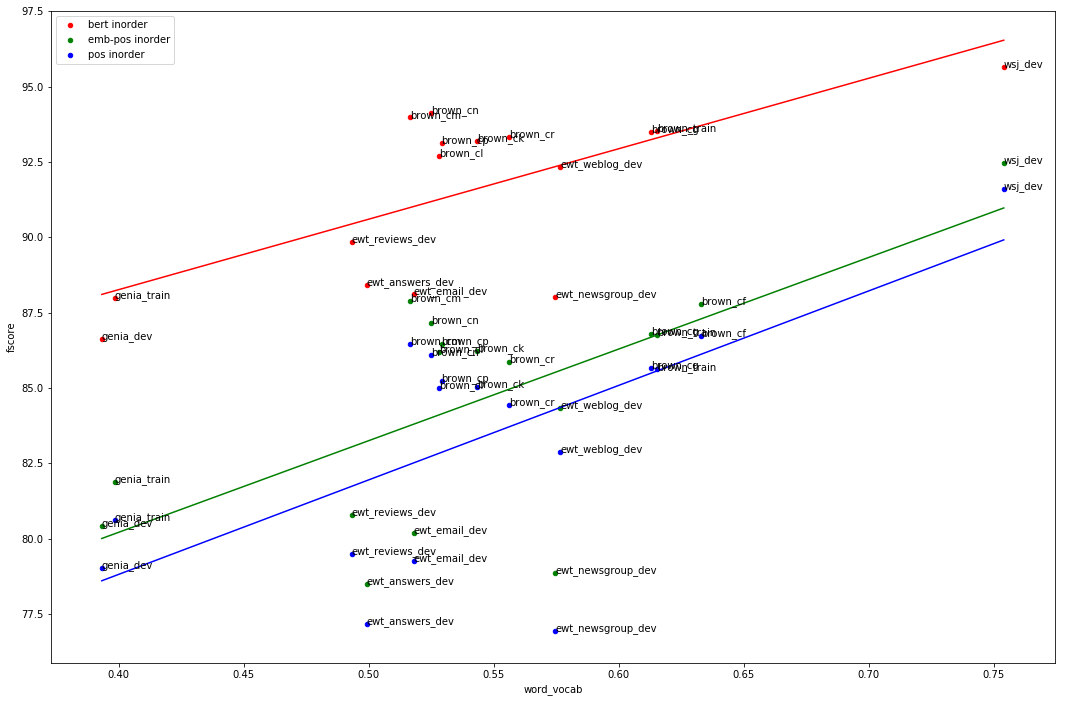

In [114]:
plot(grouped_decodes.dropna(), best_fit=True)

('bert', 'topdown') best fit: [23.65510333 78.66695969]
('emb-pos', 'topdown') best fit: [29.84796401 67.87257336]
('pos', 'topdown') best fit: [32.3266045  65.12224688]


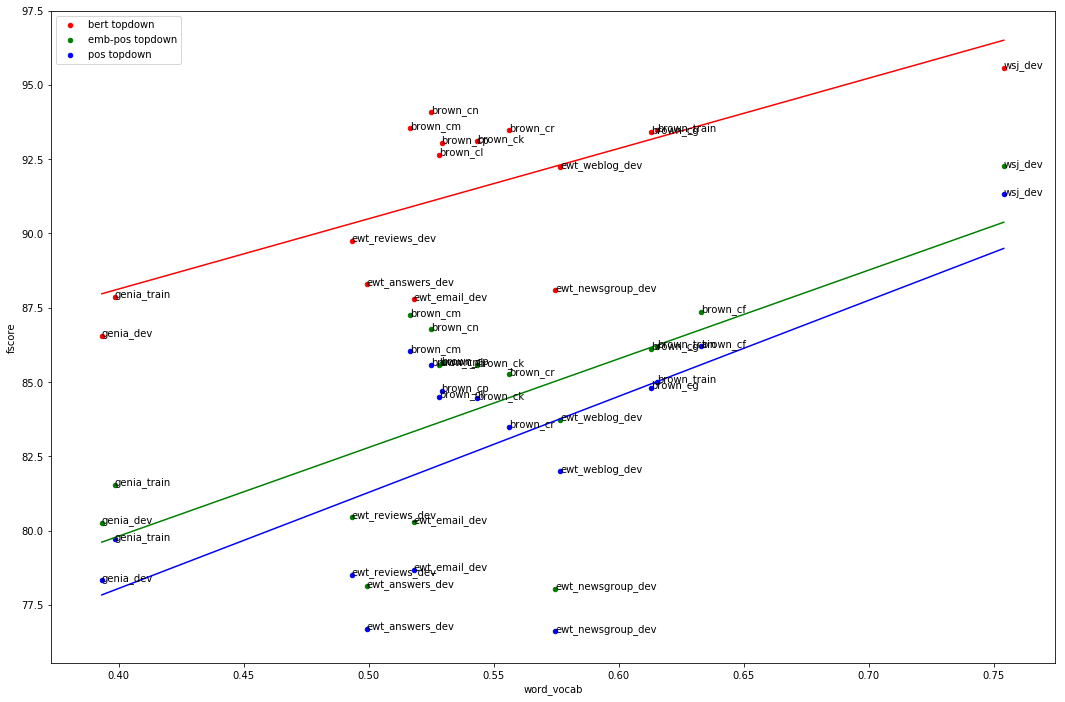

In [115]:
plot(grouped_decodes.dropna(), best_fit=True, parser_type='topdown')

In [116]:
CORPUS_STAT_COLS

['word_vocab',
 'productions',
 'multi_word_productions',
 'multi_word_span_labels',
 'length_hist_intersection']

('bert', 'inorder') best fit: [ 2.88312923 89.39822677]
('emb-pos', 'inorder') best fit: [10.71289749 76.60526207]
('pos', 'inorder') best fit: [10.73533297 75.32984319]


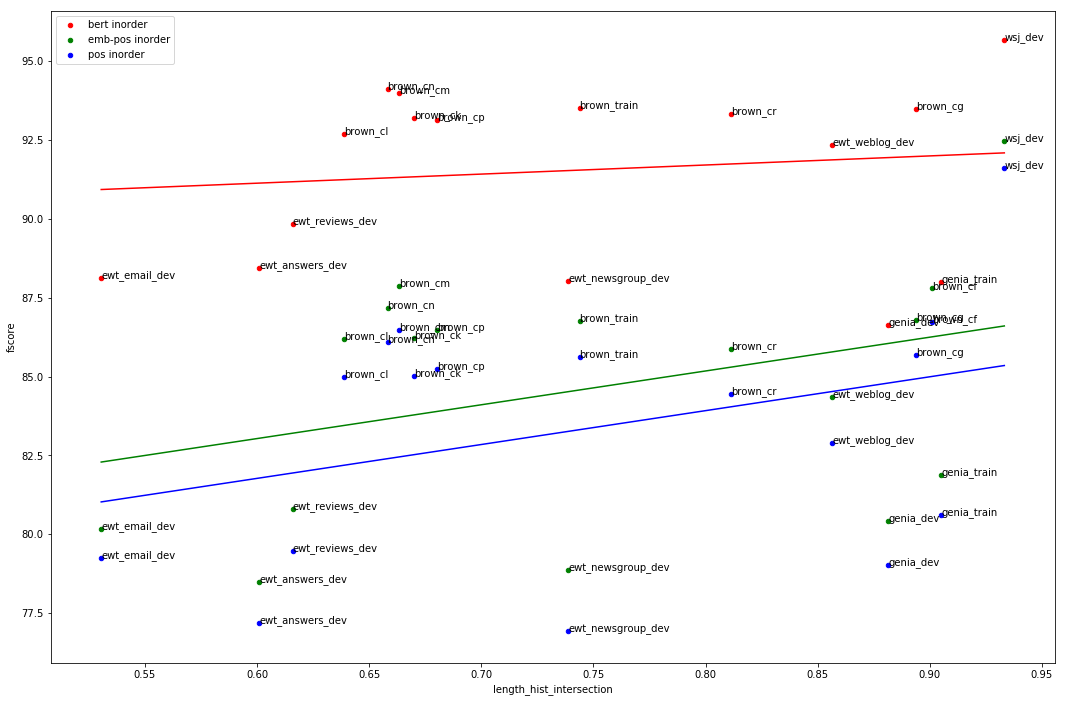

In [118]:
plot(grouped_decodes.dropna(), x_label='length_hist_intersection', best_fit=True, parser_type='inorder')

('bert', 'inorder') best fit: [28.79647941 68.06188552]
('emb-pos', 'inorder') best fit: [44.64649673 48.02723144]
('pos', 'inorder') best fit: [45.78938879 45.83179655]


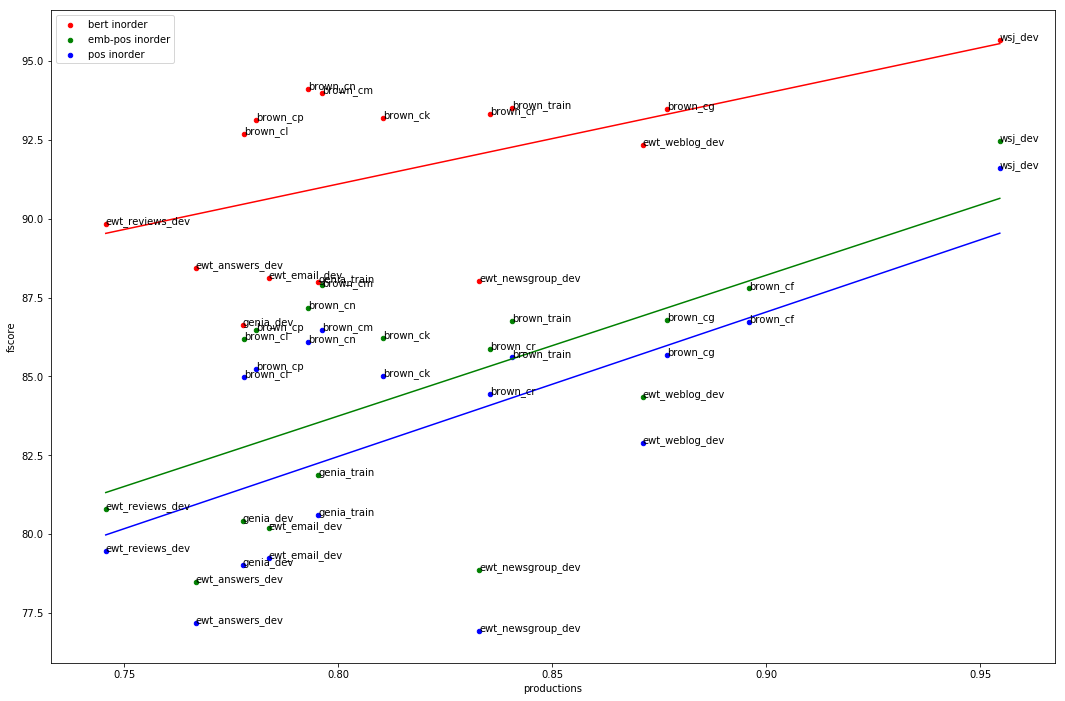

In [119]:
plot(grouped_decodes.dropna(), x_label='productions', best_fit=True, parser_type='inorder')